<a href="https://colab.research.google.com/github/dandamudi-geeta/ComputerVision/blob/main/2348512_CV(Lab3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from PIL import Image

In [14]:
import cv2
from google.colab.patches import cv2_imshow

In [15]:
#Using OpenCV
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/Gold Fish.jpg')

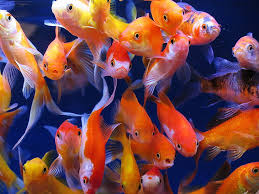

In [16]:
cv2_imshow(img)

**Image Negative: To perform image negation with PIL (Python Imaging Library)**




In [21]:
from PIL import Image

# Open the image
img = Image.open('/content/Gold Fish.jpg')

# Image Negation
negated_image = Image.new('RGB', img.size)
for x in range(img.size[0]):
    for y in range(img.size[1]):
        r, g, b = img.getpixel((x, y))
        negated_image.putpixel((x, y), (255 - r, 255 - g, 255 - b))

In [34]:
import cv2
import matplotlib.pyplot as plt

oimg = cv2.imread('/content/Gold Fish.jpg')
oimg = cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB)

(<Axes: title={'center': 'Gray negative Image'}>,
 Text(0.5, 1.0, 'Gray negative Image'))

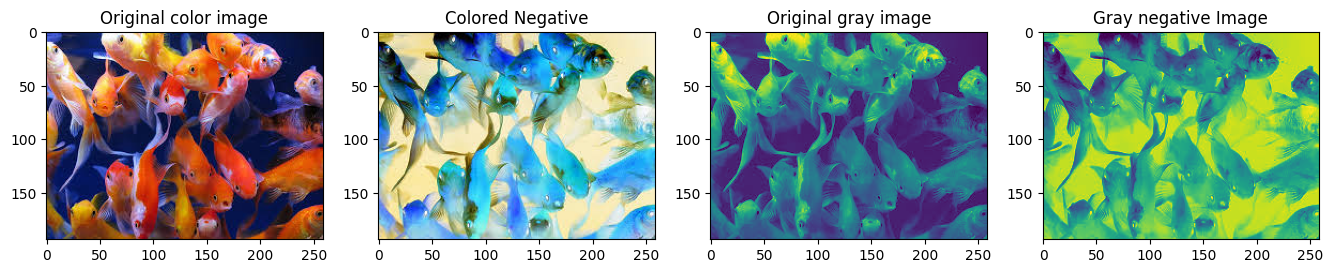

In [36]:
ogray = cv2.imread('/content/Gold Fish.jpg', 0)
colored_negative = abs(255-oimg)
gray_negative = abs(255-ogray)

plt.figure(figsize=(25, 5), constrained_layout=False)
plt.subplot(161), plt.imshow(oimg), plt.title("Original color image")
plt.subplot(162), plt.imshow(colored_negative), plt.title("Colored Negative")
plt.subplot(163), plt.imshow(ogray), plt.title("Original gray image")
plt.subplot(164), plt.imshow(gray_negative), plt.title("Gray negative Image")

**User Defined Methods**

In [38]:
import numpy as np

In [39]:
def create_negative(image):
    # Check if the image is grayscale or color
    if len(image.shape) == 2:  # Grayscale image
        negative = np.abs(255 - image)
    elif len(image.shape) == 3:  # Color image
        negative = np.abs(255 - image)
    else:
        raise ValueError("Unsupported image format")

    return negative

# Read the original color image
oimg = cv2.imread('/content/Gold Fish.jpg')

# Read the original grayscale image
ogray = cv2.imread('/content/Gold Fish.jpg', 0)

# Create negative images
colored_negative = create_negative(oimg)
gray_negative = create_negative(ogray)

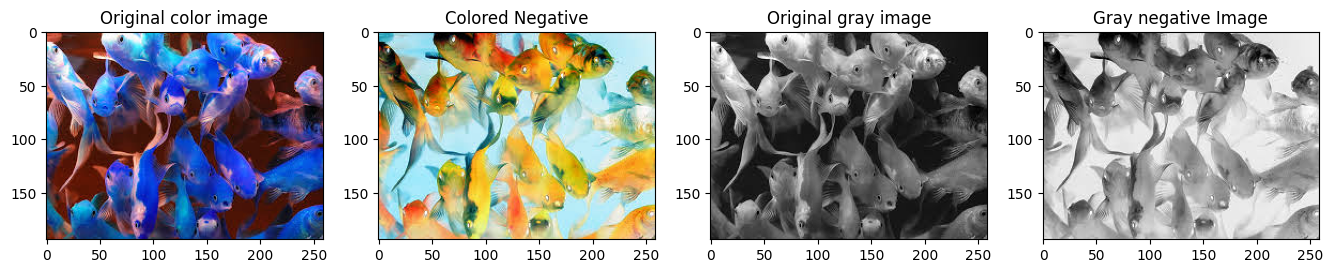

In [40]:
# Plotting
plt.figure(figsize=(25, 5), constrained_layout=False)
plt.subplot(161), plt.imshow(oimg), plt.title("Original color image")
plt.subplot(162), plt.imshow(colored_negative), plt.title("Colored Negative")
plt.subplot(163), plt.imshow(ogray, cmap='gray'), plt.title("Original gray image")
plt.subplot(164), plt.imshow(gray_negative, cmap='gray'), plt.title("Gray negative Image")

plt.show()

**Gray level slicing- Highlighting specific range of gray levels in an image**

In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('/content/Gold Fish.jpg',0)

#  Find width and height of image
row, column= img.shape

#  Create an zeros array to store the sliced image
img1 = np.zeros((row,column),dtype = 'uint8')

#  Specify the min and max range
min_range = 80
max_range = 140

# Loop over the input image and if pixel value lies in desired range set it to 255
# otherwise set it to desired value
for i in range(row):
    for j in range(column):
        if img[i,j]>min_range and img[i,j]<max_range:
            img1[i,j] = 255
        else:
            img1[i,j] = img[i,j]


(<Axes: title={'center': 'Gray level sliced image'}>,
 Text(0.5, 1.0, 'Gray level sliced image'))

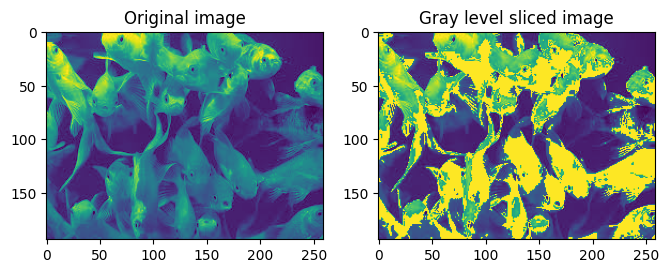

In [43]:
# Displat the stretched image\
plt.figure(figsize=(25, 5), constrained_layout=False)
plt.subplot(161), plt.imshow(img), plt.title("Original image")
plt.subplot(162), plt.imshow(img1), plt.title("Gray level sliced image")

In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('/content/Gold Fish.jpg', 0)

# Define the min and max range for slicing
min_range = 80
max_range = 140

# Apply gray level slicing using NumPy array operations
img1 = np.where((img >= min_range) & (img <= max_range), 255, img)

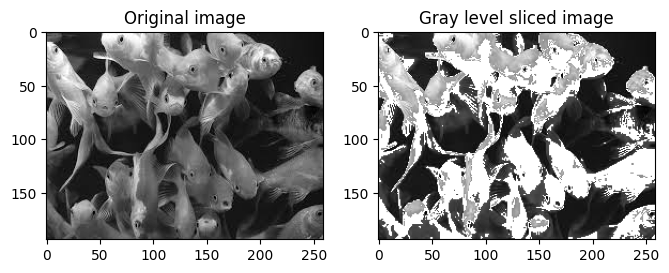

In [46]:
# Display the original and sliced images
plt.figure(figsize=(25, 5), constrained_layout=False)
plt.subplot(161), plt.imshow(img, cmap='gray'), plt.title("Original image")
plt.subplot(162), plt.imshow(img1, cmap='gray'), plt.title("Gray level sliced image")
plt.show()

**Histogram Equalization**

In [52]:
import cv2 as cv

In [53]:
# Read the image in grayscale
img = cv.imread('/content/Gold Fish.jpg', cv.IMREAD_GRAYSCALE)

# Check if the image file was read successfully
assert img is not None, "File could not be read, check with os.path.exists()"

# Perform histogram equalization
equ = cv.equalizeHist(img)

# Display original and equalized images
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

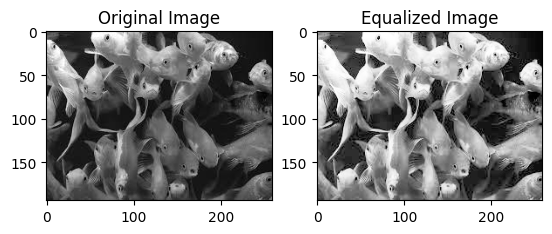

In [54]:
# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Equalized Image
plt.subplot(1, 2, 2)
plt.imshow(equ, cmap='gray')
plt.title('Equalized Image')

plt.show()

In [49]:
def histogram_equalization(img):
    # Compute histogram
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Perform histogram equalization
    equalized_img = np.interp(img.flatten(), bins[:-1], cdf_normalized).reshape(img.shape)

    return equalized_img

# Read the image in grayscale
img = plt.imread('/content/Gold Fish.jpg')

# Convert to grayscale if the image is in color
if len(img.shape) > 2:
    img = np.dot(img[..., :3], [0.299, 0.587, 0.114])

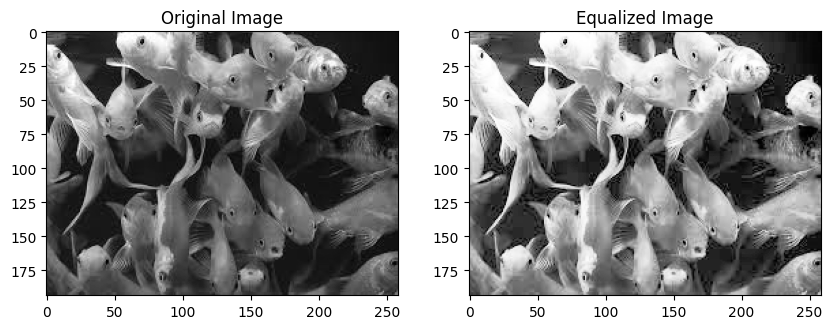

In [50]:
# Perform histogram equalization
equalized_img = histogram_equalization(img)

# Display original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()